In [1]:
from files_cleaning import *
import pandas as pd
import numpy as np
import seaborn as sns
import networkx as nx
import natsort
from operator import itemgetter

import readline # see https://github.com/daniel-acuna/reviewer_assignment/issues/29
%load_ext rpy2.ipython 


pd.set_option("display.max_rows",999)

%matplotlib inline
import matplotlib.pyplot as plt

#this below wokrs offline, see here https://www.reddit.com/r/IPython/comments/3tibc8/tip_on_how_to_run_plotly_examples_in_offline_mode/
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly.graph_objs import *
init_notebook_mode()  # run at the start of every ipython notebook to use plotly.offline
import cufflinks as cf
import qgrid

%config InlineBackend.figure_format = 'svg' #see https://stackoverflow.com/a/36622238/4929813


# import matplotlib
# matplotlib.style.use('ggplot')

/home/giuseppec/miniconda3/envs/graphs/lib/python3.5/site-packages/rpy2/robjects/robject.py:6: UserWarning: During startup - 
  rpy2.rinterface.initr()
/home/giuseppec/miniconda3/envs/graphs/lib/python3.5/site-packages/rpy2/robjects/robject.py:6: UserWarning: Warning messages:

  rpy2.rinterface.initr()
/home/giuseppec/miniconda3/envs/graphs/lib/python3.5/site-packages/rpy2/robjects/robject.py:6: UserWarning: 1: Setting LC_MONETARY failed, using "C" 

  rpy2.rinterface.initr()
/home/giuseppec/miniconda3/envs/graphs/lib/python3.5/site-packages/rpy2/robjects/robject.py:6: UserWarning: 2: Setting LC_PAPER failed, using "C" 

  rpy2.rinterface.initr()
/home/giuseppec/miniconda3/envs/graphs/lib/python3.5/site-packages/rpy2/robjects/robject.py:6: UserWarning: 3: Setting LC_MEASUREMENT failed, using "C" 

  rpy2.rinterface.initr()


In [2]:
# to temporarly reduce output
# pd.set_option('display.max_rows', 20)

# importing

In [3]:
##############
#GENERAL FILE#
##############

Gen_one=pd.read_excel('PAPER_1_Gen_1_rule_thin_1.xls')
Gen_two=pd.read_excel('PAPER_1_Gen_2_rules.xls')
Gen_three=pd.read_excel('PAPER_1_Gen_3_genetic_res.xls')
Gen_four=pd.read_excel('PAPER_1_Gen_4_eco_serv.xls')

ecoregion='/media/giuseppec/25F62A4E5FEED162/work/FORMIT/WP3/LCA/correspondence_file/countr_ecor_correspondence.csv'
management_codes='/media/giuseppec/25F62A4E5FEED162/work/FORMIT/WP3/LCA/correspondence_file/Sp_man_codes.xls'
species_codes='/media/giuseppec/25F62A4E5FEED162/work/FORMIT/WP3/LCA/correspondence_file/Sp_man_codes.xls'

gen_no_ped=import_general_file(Gen_one,Gen_two,Gen_three,Gen_four,ecoregion,management_codes,species_codes)

#add pedigree 
gen_all=add_pedigre(gen_no_ped,'Pedigree_matrix_GC.xls') 

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


/home/giuseppec/miniconda3/envs/graphs/lib/python3.5/site-packages/pandas/util/decorators.py:91: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/media/giuseppec/25F62A4E5FEED162/work/papers/first paper questionnarie/graphs_tables/files_cleaning.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/media/giuseppec/25F62A4E5FEED162/work/papers/first paper questionnarie/graphs_tables/files_cleaning.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/media/giuseppec/25F62A4E5FEED162/work/

# Export excel

In [4]:
# export_file(gen_all,
#             '/media/giuseppec/25F62A4E5FEED162/work/papers/first paper questionnarie/ELCIFO/database/general_information.xls',
#             ['Country','Ecore_name', 'Ecoregion','Man_syst','Sp_group','Man_syst_code','Sp_gr_code','FU','Rel', 'Compl', 'T_cor', 'G_cor','FT_cor', 'DQD', 'QA',
#              'itinerary','Rotation','Goal_diam','Main_sp','Mois_field','Den_fresh','Den_dried','OMS','OMS-Mois','OMS-Den_fre','OMS-Den__dri','Sec_sp','SS-Mois','SS-Den_fresh','reg','type_seed',
#           'Age_seed','Orig_seed','Dens','equip','staff','harv_equip','harv_staff','road','trail','Rul__th1','Val_th1','typ_th1',
#           'targ_th1','un_th1','com_th1','Rul__cle','Val_cle','com_cle','Rul__sel','Val_sel','targ_sel','un_sel','com_sel','Rul__pre',
#           'Val_pre','age_pre','targ_pre','com_pre','Rul__grad','Val_grad','com_grad','DS_rot/goal','DS_comp','DS_reg','DS_transp',
#           'DS_int/rul','DS_equip','DS_inpu','DS_harv/ha'],
#             ['Country','Eco_name', 'Eco_code','Man_syst','Sp_group','Man_syst_code','Sp_gr_code','FoU','Rel', 'Compl', 'T_cor', 'G_cor','FT_cor', 'DQD', 'QA',
#              'Itinerary','Rotation','Goal_diam','Main_sp','Mois_field','Den_fresh','Den_dried','OMS','OMS-Mois','OMS-Den_fre','OMS-Den__dri','Sec_sp','SS-Mois',
#              'SS-Den_fresh','Reg', 'Type_seed', 'Age_seed','Orig_seed','Dens','Equip','Staff','Harv_equip','Harv_staff','Road','Trail','Rul__th1','Val_th1','Typ_th1',
#           'Targ_th1','Un_th1','Com_th1','Rul__cle','Val_cle','Com_cle','Rul__sel','Val_sel','targ_sel','Un_sel','Com_sel','Rul__pre',
#           'Val_pre','Age_pre','Targ_pre','Com_pre','Rul__grad','Val_grad','com_grad','DS_rot/goal','DS_comp','DS_reg','DS_transp',
#           'DS_int/rul','DS_equip','DS_inpu','DS_harv/ha']
#            )

## For sankeymatic

In [6]:
# clean_sankeymatic(gen_all,'Man_syst_code','Sp_gr_code')

# Forest Units reported

In [7]:
#tot numb of FU
gen_all.shape[0]

235

In [8]:
#numb by ecoregion
gen_all.groupby('Ecore_name').size().sort_values(ascending=False)

Ecore_name
Central_West_EU    95
North_EU           49
Central_East_EU    42
South_West_EU      29
South_East_EU      20
dtype: int64

In [9]:
#numb by sp
gen_all.groupby(['Man_syst']).size().sort_values(ascending=False)

Man_syst
Even-aged forest with shelterwood             70
Unmanaged forests                             62
Even-aged forest: Uniform clear-cut system    51
Continuous cover forest management            26
Coppice                                       11
Short rotation                                 9
Coppice with standards                         6
dtype: int64

In [10]:
#numb by ecoregion,man
gen_all.groupby(['Ecore_name','Man_syst']).size().reset_index().sort_values(['Ecore_name','Man_syst'])

,Ecore_name,Man_syst,0
0,Central_East_EU,Continuous cover forest management,2
1,Central_East_EU,Coppice,2
2,Central_East_EU,Even-aged forest with shelterwood,13
3,Central_East_EU,Even-aged forest: Uniform clear-cut system,11
4,Central_East_EU,Short rotation,1
5,Central_East_EU,Unmanaged forests,13
6,Central_West_EU,Continuous cover forest management,12
7,Central_West_EU,Coppice,5
8,Central_West_EU,Coppice with standards,4
9,Central_West_EU,Even-aged forest with shelterwood,27


In [11]:
#numb by man,sp
gen_all.groupby(['Man_syst','Sp_group']).size().reset_index().sort_values(['Man_syst','Sp_group'])

,Man_syst,Sp_group,0
0,Continuous cover forest management,Light demanding conifers,3
1,Continuous cover forest management,Shade tolerant conifers,13
2,Continuous cover forest management,Slow growing light demanding deciduous,3
3,Continuous cover forest management,Slow growing shade tolerant deciduous,7
4,Coppice,Fast growing deciduous,6
5,Coppice,Mediterranean evergreen trees,1
6,Coppice,Slow growing light demanding deciduous,4
7,Coppice with standards,Slow growing light demanding deciduous,5
8,Coppice with standards,Slow growing shade tolerant deciduous,1
9,Even-aged forest with shelterwood,Fast growing deciduous,2


In [12]:
#numb by ecoregion,sp
gen_all.groupby(['Ecore_name','Sp_group']).size().reset_index().sort_values(['Ecore_name','Sp_group'])

,Ecore_name,Sp_group,0
0,Central_East_EU,Fast growing deciduous,5
1,Central_East_EU,Light demanding conifers,7
2,Central_East_EU,Shade tolerant conifers,10
3,Central_East_EU,Slow growing light demanding deciduous,9
4,Central_East_EU,Slow growing shade tolerant deciduous,11
5,Central_West_EU,Fast growing deciduous,13
6,Central_West_EU,Light demanding conifers,17
7,Central_West_EU,Shade tolerant conifers,22
8,Central_West_EU,Slow growing light demanding deciduous,25
9,Central_West_EU,Slow growing shade tolerant deciduous,18


In [13]:
#numb by ecoregion,man,sp
gen_all.groupby(['Ecore_name','Man_syst','Sp_group']).size().reset_index().sort_values(['Man_syst','Ecore_name'])

,Ecore_name,Man_syst,Sp_group,0
0,Central_East_EU,Continuous cover forest management,Shade tolerant conifers,1
1,Central_East_EU,Continuous cover forest management,Slow growing shade tolerant deciduous,1
18,Central_West_EU,Continuous cover forest management,Light demanding conifers,2
19,Central_West_EU,Continuous cover forest management,Shade tolerant conifers,5
20,Central_West_EU,Continuous cover forest management,Slow growing light demanding deciduous,2
21,Central_West_EU,Continuous cover forest management,Slow growing shade tolerant deciduous,3
42,North_EU,Continuous cover forest management,Light demanding conifers,1
43,North_EU,Continuous cover forest management,Shade tolerant conifers,4
44,North_EU,Continuous cover forest management,Slow growing light demanding deciduous,1
45,North_EU,Continuous cover forest management,Slow growing shade tolerant deciduous,1


# Filter low quality data

In [14]:
gen_all=filter_pedigre_unmanaged(gen_all,'Pedigree_matrix_GC.xls',['A','B'])
# gen_all[gen_all.Man_syst!='Unmanaged forests'].shape[0]


## Rotation

In [15]:
def data_rotat(alltog):
    """function that takes alltog and produce the table of rotation period by ecoregion,
     species groups and management to be used for the graphs"""

    #take out unmanaged and continuous
    rotation=alltog[['Country','Ecoregion', u'Man_syst', u'Sp_group',"Man_syst_code", "Sp_gr_code",'Rotation','FU']]
    non_man=['Unmanaged forests','Continuous cover forest management'] 
    rotation=rotation[~rotation.Man_syst.isin(non_man)]
    
    rotation['rot_yrs']=rotation['Rotation']
    
    #change rotation categoris with int
    rota_val=['0', '1-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50',
     '51-55', '56-60', '61-65', '66-70', '71-75', '76-80', '81-85', '86-90', '91-95', '96-100',
     '101-105', '106-110', '111-115', '116-120', '121-125', '126-130', '131-135', '136-140', '141-145', '146-150',
     '151-155', '156-160', '161-165', '166-170', '171-175', '176-180', '181-185', '186-190', '191-195', '196-200',
     '201-205', '206-210', '211-215', '216-220','221-225']
    rot_conv={}
    for ind,val in enumerate(rota_val):
        rot_conv[val]=ind
    rotation.Rotation.replace(rot_conv,inplace=True)
    
    #sort man_sp
    rotation=rotation.sort_values('FU')
    
    

    # rotation.Rotation=rotation.Rotation.astype(str)   #needed before when I converted to categories, not anymore


    y_labels=itemgetter(*(range(0,len(rota_val)+1,5)))(rota_val) #the ytick lables
    
    
    return rotation,y_labels
rotat,y_lab=data_rotat(gen_all)

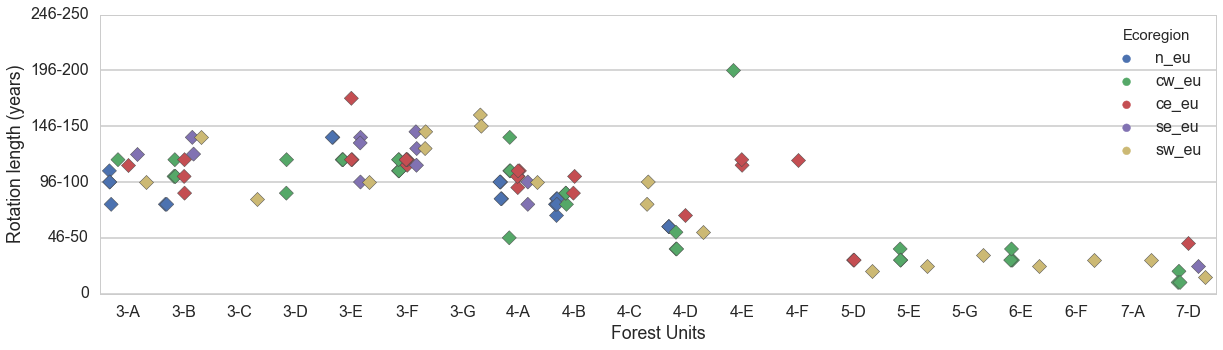

In [16]:
plt.figure(figsize=(20, 5))
sns.set_style("whitegrid")


sns.set_context("poster")
# sw_r=sns.swarmplot(x="FU", y="Rotation", hue="Ecoregion",data=rotat,size=9,split=True,edgecolor='gray')
# sw_r=sns.boxplot(x="FU", y="Rotation", data=rotat)

sw_r=sns.stripplot(x="FU", y="Rotation", hue="Ecoregion",data=rotat,size=10,split=True,jitter=True,linewidth=0.5,marker="D",)#,marker=next(mark))# 
sw_r.set(ylim=(0)) #http://stackoverflow.com/questions/25212986/how-to-set-some-xlim-and-ylim-in-seaborn-lmplot-facetgrid
sw_r.set(yticklabels=['0', '46-50', '96-100', '146-150','196-200','246-250']); #change the ytick lables style='darkgrid'
sw_r.set(xlabel='Forest Units',ylabel='Rotation length (years)')


In [18]:
#number-yr_range relation (used below)
rot_val=rotat[['Rotation','rot_yrs']].drop_duplicates().dropna()

In [19]:
#average rotation lenght
rot_val[rot_val.Rotation==rotat['Rotation'].mean().round()]

,Rotation,rot_yrs
150,18.0,86-90


In [20]:
# avg rotation lenght by man syst
avg_man=rotat[['Man_syst','Rotation']].groupby('Man_syst').mean().round().reset_index()  #4=16-20; 5=21-25;6=26-30; 17.0 =81-85;23 =111-115
avg_man.merge(rot_val, how='left',on='Rotation').sort_values('Rotation')

,Man_syst,Rotation,rot_yrs
4,Short rotation,4.0,16-20
0,Coppice,6.0,26-30
1,Coppice with standards,6.0,26-30
3,Even-aged forest: Uniform clear-cut system,18.0,86-90
2,Even-aged forest with shelterwood,24.0,116-120


In [21]:
# avg rotation lenght by sp gr
avg_man=rotat[['Sp_group','Rotation']].groupby('Sp_group').mean().round().reset_index()  #4=16-20; 5=21-25;6=26-30; 17.0 =81-85;23 =111-115
avg_man.merge(rot_val, how='left',on='Rotation').sort_values('Rotation')

,Sp_group,Rotation,rot_yrs
0,Fast growing deciduous,9.0,41-45
2,Mediterranean conifers,18.0,86-90
5,Slow growing light demanding deciduous,19.0,91-95
1,Light demanding conifers,20.0,96-100
4,Shade tolerant conifers,20.0,96-100
3,Mediterranean evergreen trees,23.0,111-115
6,Slow growing shade tolerant deciduous,23.0,111-115


In [22]:
# max and min rotation
rotat.sort_values('Rotation',ascending=0).head()

,Country,Ecoregion,Man_syst,Sp_group,Man_syst_code,Sp_gr_code,Rotation,FU,rot_yrs
17,Belgium,cw_eu,Even-aged forest: Uniform clear-cut system,Slow growing light demanding deciduous,4,E,40.0,4-E,196-200
151,Poland,ce_eu,Even-aged forest with shelterwood,Slow growing light demanding deciduous,3,E,35.0,3-E,171-175
164,Portugal,sw_eu,Even-aged forest with shelterwood,Mediterranean evergreen trees,3,G,32.0,3-G,156-160
200,Spain,sw_eu,Even-aged forest with shelterwood,Mediterranean evergreen trees,3,G,30.0,3-G,146-150
187,Slovenia,se_eu,Even-aged forest with shelterwood,Slow growing shade tolerant deciduous,3,F,29.0,3-F,141-145


# Regeneration

In [23]:
def data_regen(alltog):
    """function that takes alltog and produce frequency of regeneration type by ecoregion,
     species groups and management"""
    
    reg=alltog[[u'Ecoregion',"Man_syst_code",'Country', "Sp_gr_code",u'reg','type_seed', 
                u'Age_seed','Orig_seed', u'Dens','FU']]
    reg.rename(columns={'reg': 'Regeneration type'}, inplace=True)
    # delete unamanged forest
    reg=reg[reg['Man_syst_code']!=1]


#     f, axes = plt.subplots(1, 3, figsize=(12,6), sharex=True, sharey=True)# create sublot using use axes array see http://matplotlib.org/users/recipes.html

#     g=sns.countplot(hue='reg',data=reg,x='Man_syst_code' ,ax=axes[0]) #ax=Axes i.e position to drawn the plot
#     sns.countplot(hue='reg',data=reg,x='Sp_gr_code',ax=axes[1] )
#     sns.countplot(hue='reg',data=reg,x='Ecoregion' ,ax=axes[2])
#     g.set_ylabels("survival probability")
#     f.set_label?
    return reg
regeneration=data_regen(gen_all)

/home/giuseppec/miniconda3/envs/graphs/lib/python3.5/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [24]:
# just to check density of plantation
# regeneration[['Country','FU','Ecoregion' ,'Regeneration type','Dens']].dropna(subset=['Dens']) 

In [25]:
# groupby and send to R
reg_coun=regeneration[['Country','FU','Ecoregion' ,'Regeneration type']].groupby(['FU','Ecoregion' ,'Regeneration type']).size()
reg_coun=reg_coun.reset_index()
reg_coun['Regeneration type'].replace({'natural+artificial from plantation':'natural+artificial from planting','artificial from plantation':'artificial from plantating'},inplace=True)
%R -i reg_coun # send to R

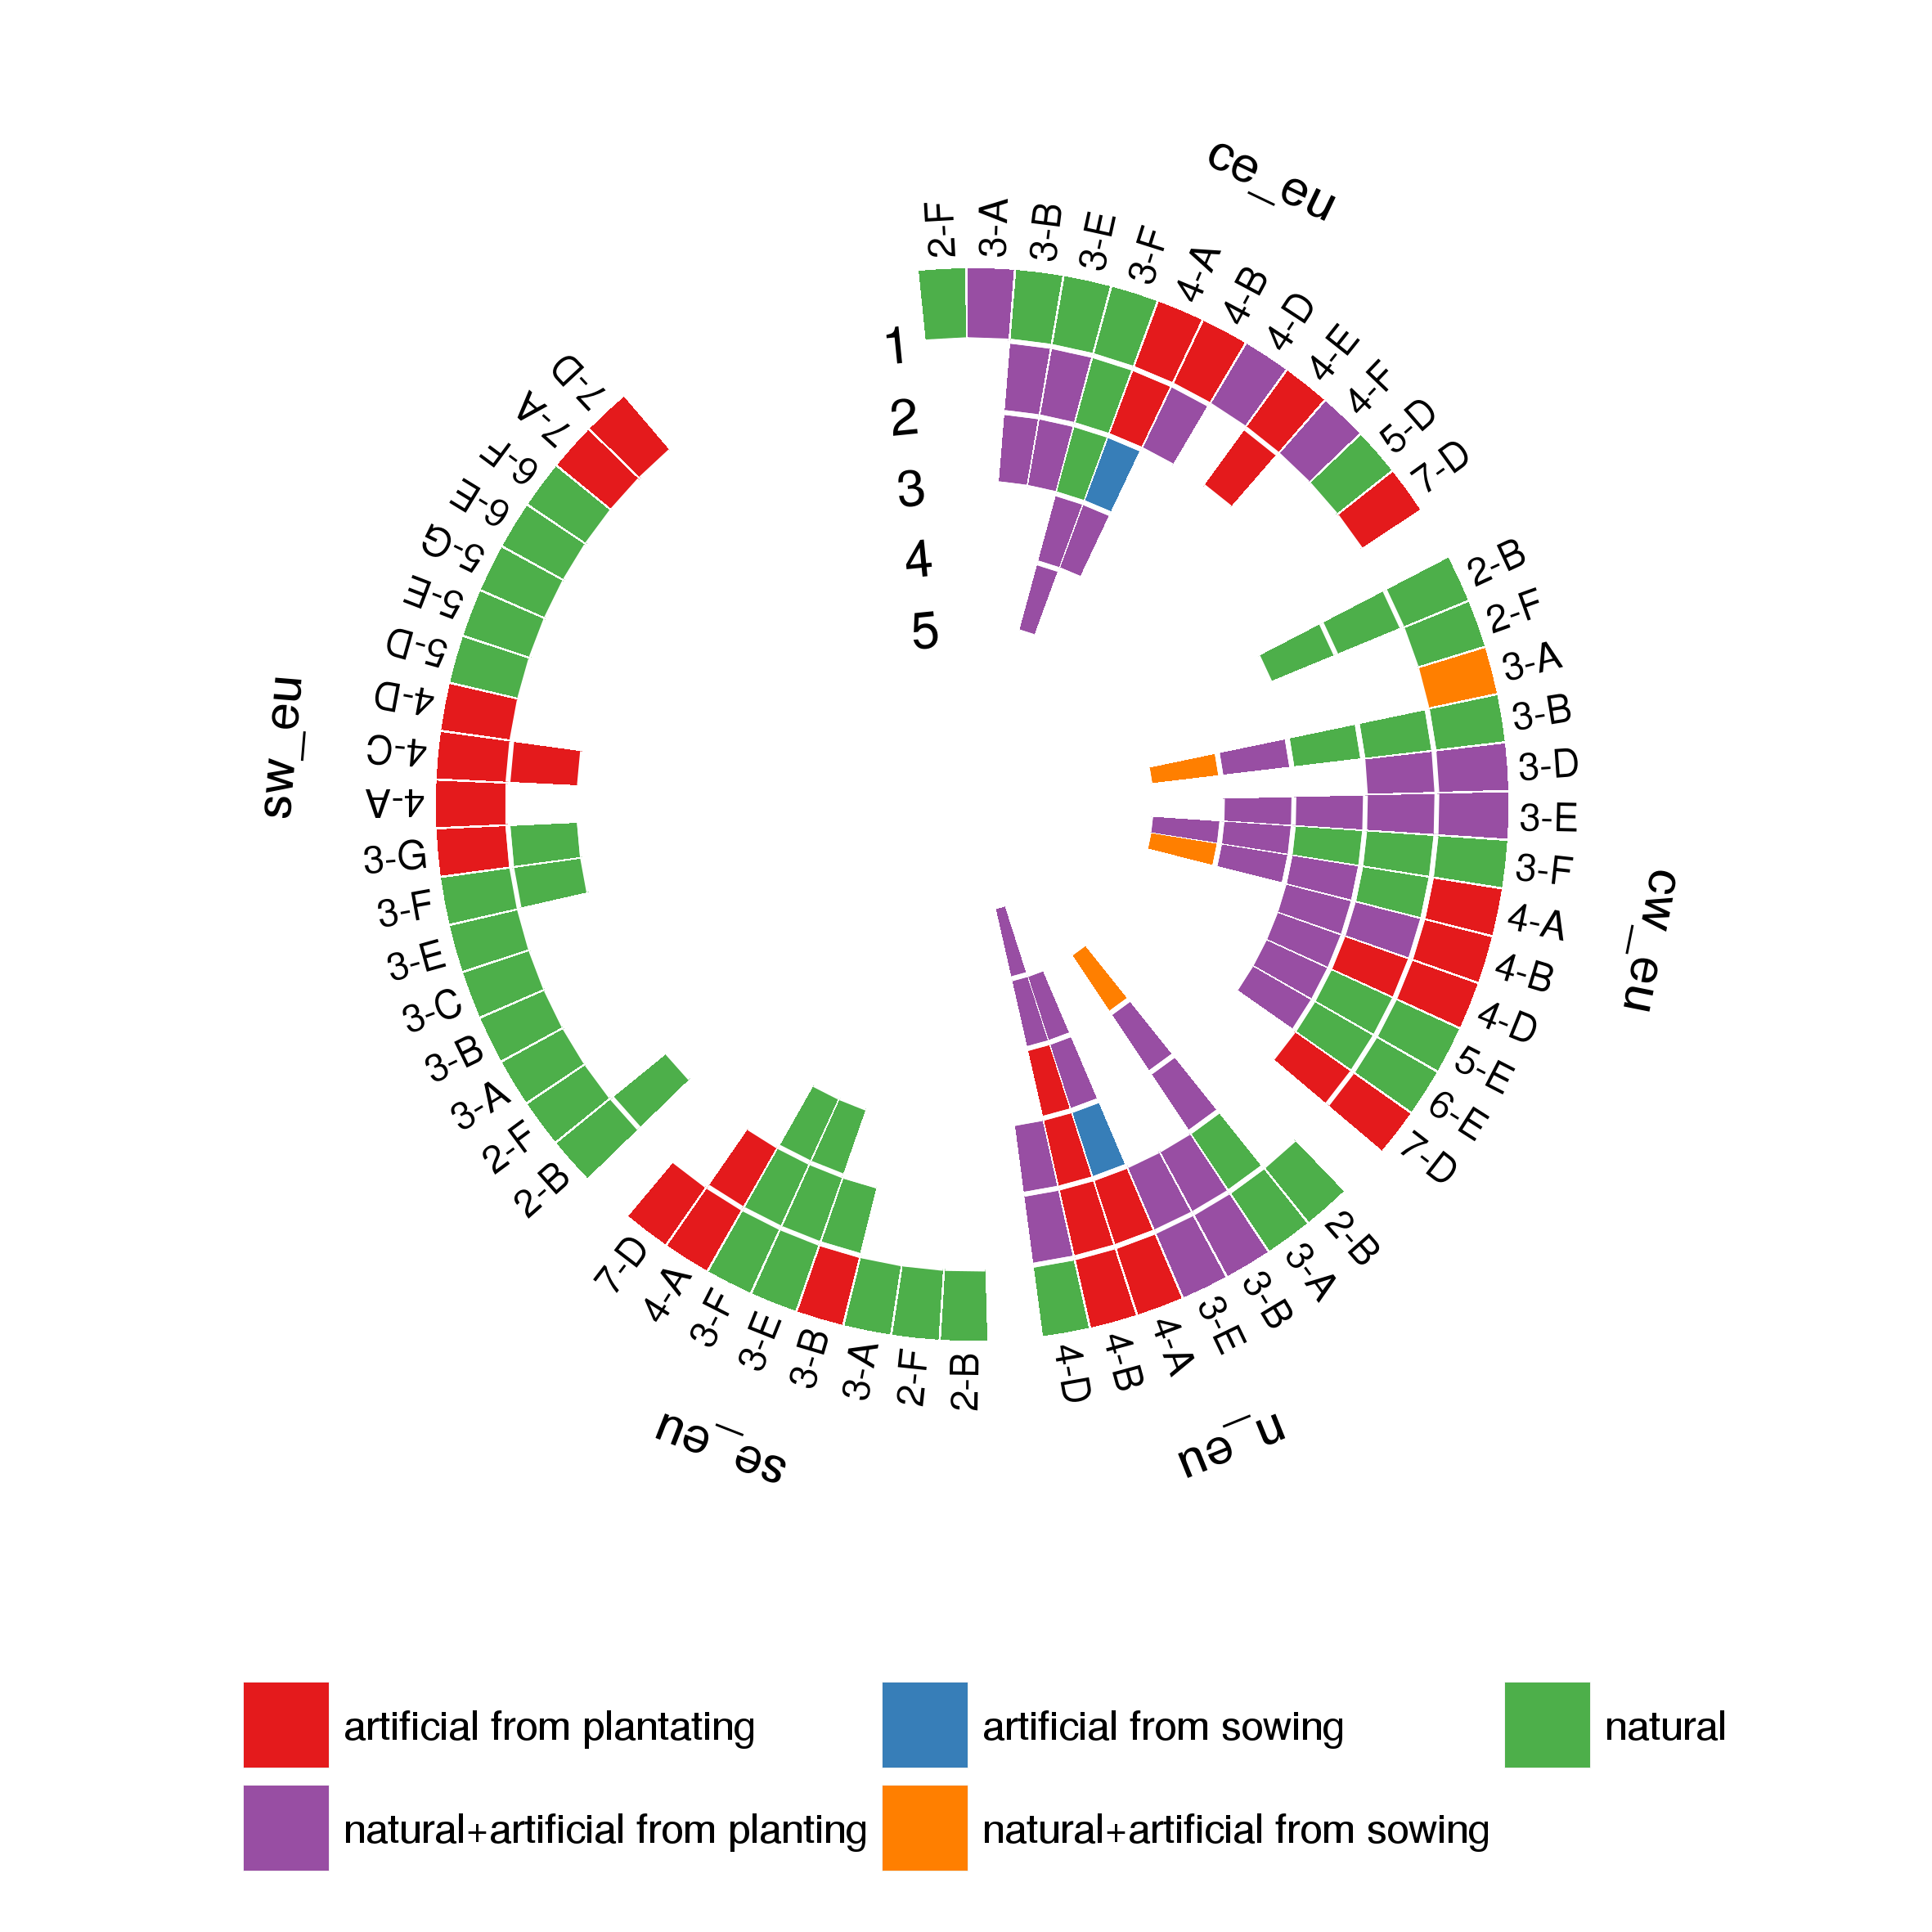

In [31]:
%%R -w 15 -h 15 -u cm --res 400 --p 14 #to change the graph resolution, see https://ipython.org/ipython-doc/2/config/extensions/rmagic.html

library(easyGgplot2)
library(phenotypicForest)

p<-polarHistogram(reg_coun, 
                  columnNames = c("family"="Ecoregion",
                                   "item"="FU",
                                "score"="Regeneration.type","value"='X0'),
                  normalised = FALSE,
#                   binSize=1,
                  spaceItem=0.05,
                  familyLabel=TRUE,
                  innerRadius = 0.2,
                  outerRadius = 1,
                  alphaStart = -0.1,
                  circleProportion = 0.92,
                  direction=1, #1 from the outside to the centre, 2 the opposite
                  guides = c(1, 2, 3,4,5)
                 )

p <-p + theme(legend.position="bottom", plot.margin=unit(c(0,0,0,0),"mm")) #for easyggplot put legend at the bottom
p <-p + guides(fill=guide_legend(nrow=2,byrow=TRUE,title=NULL)) #makes the legend in two rows, title=NULL delete title of fill (i.e. score)
print(p)






# Moisture 

In [25]:
dens=gen_all[[u'Ecoregion',"Man_syst_code",'Country', 'FU', "Sp_gr_code",'Main_sp','Mois_field', 'Den_fresh', 'Den_dried',
                 #u'Man_syst', u'Sp_group',
                ]]

dens.rename(columns={'Mois_field': 'Moisture content (%)'}, inplace=True)

#take out empty and sort
dens_sort=dens[(dens['Moisture content (%)'].notnull())].sort_values('FU')# & ~(dens.Country.isin(['Netherlands']))].sort_values('FU')

/home/giuseppec/miniconda3/envs/graphs/lib/python3.5/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [26]:
dens_sort.sort_values('Moisture content (%)',ascending=True).head(22)

,Ecoregion,Man_syst_code,Country,FU,Sp_gr_code,Main_sp,Moisture content (%),Den_fresh,Den_dried
63,cw_eu,3,Germany,3-A,A,Pinus sylvestris,35.0,0.800,0.520
165,sw_eu,4,Portugal,4-C,C,Pinus pinaster,35.0,0.800,0.520
66,cw_eu,3,Germany,3-E,E,Quercus petraea,35.0,0.800,0.520
144,cw_eu,3,Netherlands,3-E,E,Oak,35.0,0.690,0.570
147,cw_eu,3,Netherlands,3-B,B,Douglas fir,35.0,0.800,0.450
145,cw_eu,3,Netherlands,3-F,F,Beech,35.0,0.670,0.560
143,cw_eu,3,Netherlands,3-D,D,Oak,35.0,0.690,0.570
70,cw_eu,4,Germany,4-A,A,Pinus sylvestris,35.0,0.800,0.520
67,cw_eu,5,Germany,5-E,E,Oak,35.0,1.000,0.650
68,cw_eu,6,Germany,6-E,E,Oak,35.0,1.000,0.650


[(25, 100.0)]

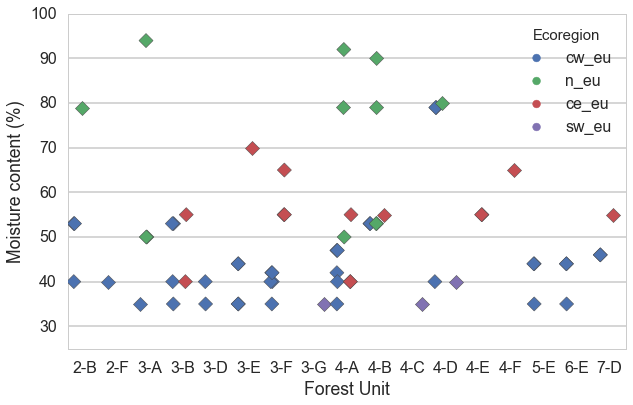

In [27]:
# moisture by FU
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.set_context("poster")
ax = sns.stripplot(x='FU', y="Moisture content (%)",hue='Ecoregion',data=dens_sort,size=10,split=True,jitter=True,linewidth=0.5,marker="D")
ax.set(xlabel='Forest Unit')
ax.set(ylim=(25))